# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-03-25 15:31:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   135MB/s    in 0.8s    

2024-03-25 15:31:45 (135 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

a very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak dir and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'


To visualize our images, first let's get the class names programmatically.

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [7]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
# Visualize it
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup a target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (382, 512, 3)


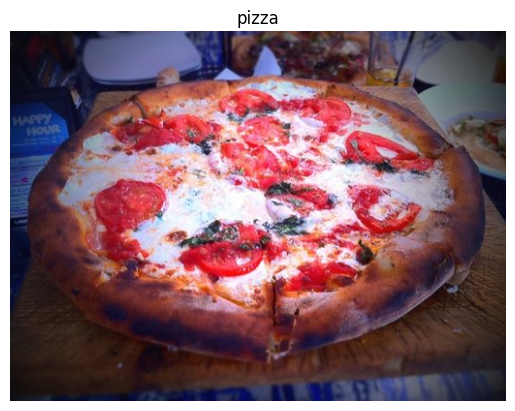

In [9]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img, dtype=tf.float32) / 256.0

<tf.Tensor: shape=(382, 512, 3), dtype=float32, numpy=
array([[[0.0390625 , 0.04296875, 0.05859375],
        [0.03515625, 0.0390625 , 0.0546875 ],
        [0.03515625, 0.0390625 , 0.0546875 ],
        ...,
        [0.05859375, 0.0625    , 0.078125  ],
        [0.05859375, 0.0625    , 0.078125  ],
        [0.05859375, 0.0625    , 0.078125  ]],

       [[0.0390625 , 0.04296875, 0.05859375],
        [0.0390625 , 0.04296875, 0.05859375],
        [0.0390625 , 0.04296875, 0.05859375],
        ...,
        [0.0625    , 0.06640625, 0.08203125],
        [0.0625    , 0.06640625, 0.08203125],
        [0.0625    , 0.06640625, 0.08203125]],

       [[0.04296875, 0.046875  , 0.0625    ],
        [0.0390625 , 0.04296875, 0.05859375],
        [0.0390625 , 0.04296875, 0.05859375],
        ...,
        [0.06640625, 0.0703125 , 0.0859375 ],
        [0.06640625, 0.0703125 , 0.0859375 ],
        [0.0625    , 0.06640625, 0.08203125]],

       ...,

       [[0.05859375, 0.0625    , 0.08203125],
        [0.05

In [11]:
img.shape

(382, 512, 3)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically a need way to:

* Load our images
* Preprocess our images
* Build a CNN
* Compile our CNN
* Fit the CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (normalization, aka scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Build a CNN model (same as Tiny VGG)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 189ms/step - loss: 0.6102 - accuracy: 0.6793 - val_loss: 0.4545 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4445 - accuracy: 0.8060 - val_loss: 0.3722 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4420 - accuracy: 0.8067 - val_loss: 0.3722 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3997 - accuracy: 0.8240 - val_loss: 0.3353 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3457 - accuracy: 0.8640 - val_loss: 0.3682 - val_accuracy: 0.8520


In [ ]:
# CPU:
# Epoch 1/5
# 47/47 [==============================] - 107s 2s/step - loss: 0.7371 - accuracy: 0.5213 - val_loss: 0.6174 - val_accuracy: 0.6420

In [ ]:
# GPU:
# Epoch 1/5
# 47/47 [==============================] - 14s 169ms/step - loss: 0.5412 - accuracy: 0.7147 - val_loss: 0.4086 - val_accuracy: 0.8120

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same mode as before

Let's replicate the model we've build in a previous section to see if it works with our image data.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate tensorflow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=["accuracy"]
)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 172ms/step - loss: 0.7325 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Upgrade model_2
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics="accuracy",
)

# Fit the model
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 515ms/step - loss: 2.3471 - accuracy: 0.6453 - val_loss: 1.0925 - val_accuracy: 0.5540
Epoch 2/5
 9/47 [====>.........................] - ETA: 17s - loss: 0.6680 - accuracy: 0.7289

KeyboardInterrupt: 

In [ ]:
model_3.summary()

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics="accuracy",
)

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
model_4.summary()

In [ ]:
15000000/31000

## Binary Classification: Let's break it down

1. Become one with data
2. Preprocess the data
3. Created a model
4. Fit the model
5. Evaluate a model
6. Adjust different parameters and improve our model
7. Repeat until safisfied

### 1. Become one with data


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


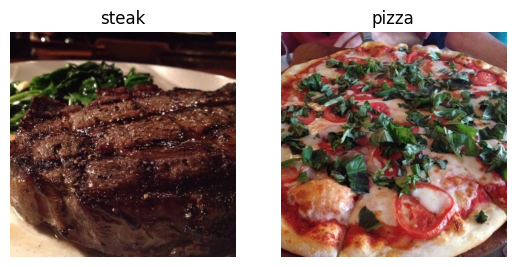

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [13]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than at all ~10_000 images at one time, a model might only look at 32 a time.

It does this for a couple of reasons:
1. 10_1000 images might now fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10_000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health

In [14]:
# Load in our image data from directories and turn them into batches
train_data = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=(224,224),
    batch_size=32,
    seed=42
)

test_data = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    image_size=(224, 224),
    batch_size=32,
    seed=42
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [15]:
# Normalize
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data_norm = iter(train_data.map(lambda x, y: (normalization_layer(x), y)))
test_data_norm = iter(test_data.map(lambda x, y: (normalization_layer(x), y)))

In [16]:
train_data_norm, test_data_norm

(<tensorflow.python.data.ops.iterator_ops.OwnedIterator at 0x7aa273577f10>,
 <tensorflow.python.data.ops.iterator_ops.OwnedIterator at 0x7aa24c5c7cd0>)

In [17]:
# Get a sample of a train data batch
images, labels = iter(train_data_norm).next()
len(images), len(labels)

(32, 32)

In [18]:
# How many batches are there?
len(train_data)

47

In [19]:
1500/32

46.875

(<matplotlib.image.AxesImage at 0x7aa24c41d120>,
 TensorShape([224, 224, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

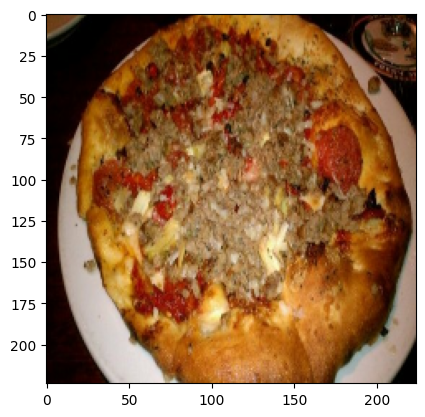

In [20]:
# Get the first image
plt.imshow(images[0]), images[0].shape, \
 tf.reduce_min(images[0]), tf.reduce_max(images[0])

In [21]:
# View the first batch labels
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)>

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with smth simple and see if it works on your data and then introduce complexity as required.

In [22]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (baseline)
model_4 = Sequential([
  Conv2D(filters=10, # (higher = more complex model) filter is the number of sliding windows going across an input
         kernel_size=3, # the size of the sliding window going across an input
         strides=1, # the size of the step the sliding window takes across an input
         padding="valid", # if "same", ouptut shape = input shape, if "valid", ouptut shape gets compress
         activation="relu",
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, 1, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
# Get a summary of our model
model_4.summary()

### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)) # ,
                        # callbacks=[tensorboard_callback]

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_1.summary()

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

In [ ]:
# Check out the loss and accuracy of our model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

NameError: name 'history_4' is not defined

In [23]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

> **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting**. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize the unseen data will be dimished.

In [ ]:
# Check out loss and accuracy of the model_4
plot_loss_curves(history_4);

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as *regularization*

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(optimizer=Adam(),
                loss='binary_crossentropy',
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
# 0.778 -> 0.5 ((((((

In [ ]:
# Get a summary
model_5.summary()

In [ ]:
model_4.summary()

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [24]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation fot the test dataset
test_datagen = ImageDataGenerator(1/255.)

In [25]:
IMG_SIZE = (224, 224)

# Import data and augment it from training dir
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
  train_dir,
  target_size=IMG_SIZE,
  batch_size=32,
  class_mode="binary",
  color_mode="rgb",
  shuffle=False # for demonstation purposes only
)

# Create a non-augmented train batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(
  train_dir,
  target_size=IMG_SIZE,
  batch_size=32,
  class_mode="binary",
  shuffle=False
)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="binary",
)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` bult-in data augmentation parameters our images are left as they are in the directorier, but are modified as they're loaded into the model.

*Data augmentation* flips/rotate/cuts etc your images to help ai memorize only strong points.

In [26]:
# Visualize data augmentation
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # only photos are augmented, not labels

Showing image number: 2


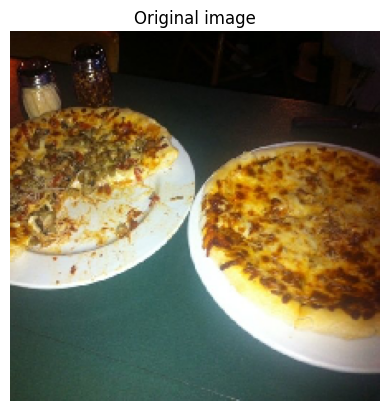

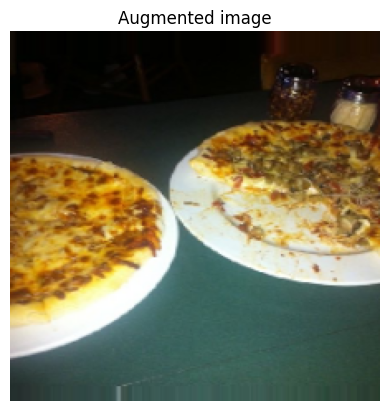

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size is 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on a augmented data

In [ ]:
# Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_6.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics="accuracy",
)

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Build ai but with shuffle=true

In [27]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
  train_dir,
  target_size=(224, 224),
  batch_size=32,
  class_mode="binary",
  shuffle=True
)

Found 1500 images belonging to 2 classes.


In [ ]:
# Build a model 7
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile a model
model_7.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics="accuracy",
)

# Fit the model
history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model's layers (e.g. add more conv2d/maxpool2d layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice**: Recreate the model from CNN explainer (model_1) and see how it performs on the augmented shuffled data.

In [30]:
# Model from CNN explainer
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile a mode
model_8.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics="accuracy",
)

# Fit the model
history_8 = model_8.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 23s 461ms/step - loss: 0.6196 - accuracy: 0.6460 - val_loss: 91.4956 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 21s 438ms/step - loss: 0.5028 - accuracy: 0.7673 - val_loss: 56.3512 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4866 - accuracy: 0.7780 - val_loss: 47.1626 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4437 - accuracy: 0.8087 - val_loss: 74.1501 - val_accuracy: 0.6820
Epoch 5/5
47/47 [==============================] - 20s 435ms/step - loss: 0.4391 - accuracy: 0.8040 - val_loss: 53.2895 - val_accuracy: 0.7740


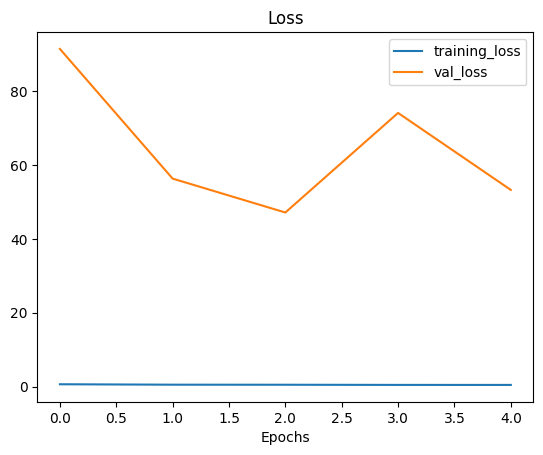

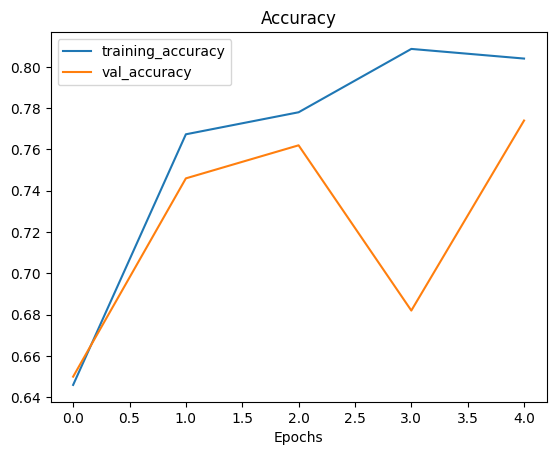

In [31]:
plot_loss_curves(history_8)

In [28]:
# Increase a number of conv2d layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics="accuracy",
)

# Fit the model
history_9 = model_9.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.6181 - accuracy: 0.6727

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


47/47 [==============================] - 24s 452ms/step - loss: 0.6181 - accuracy: 0.6727 - val_loss: 111.6576 - val_accuracy: 0.6140
Epoch 2/5
47/47 [==============================] - 32s 652ms/step - loss: 0.5487 - accuracy: 0.7353 - val_loss: 144.4800 - val_accuracy: 0.6280
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5386 - accuracy: 0.7487 - val_loss: 72.6472 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.5147 - accuracy: 0.7587 - val_loss: 39.3350 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.5135 - accuracy: 0.7600 - val_loss: 54.8411 - val_accuracy: 0.7020


In [32]:
model_8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [33]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                 

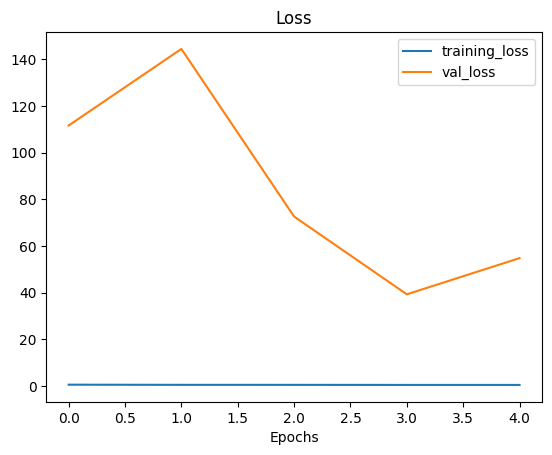

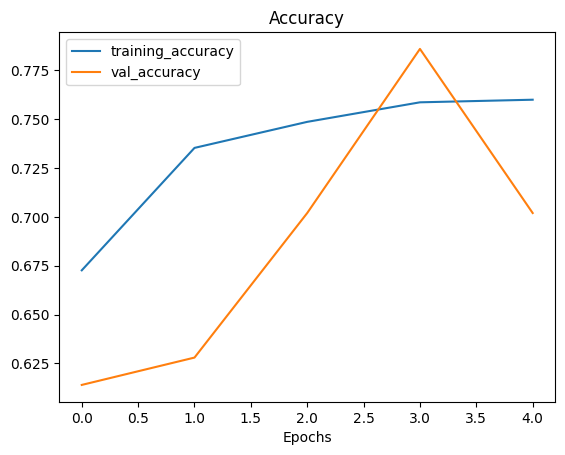

In [34]:
plot_loss_curves(history_9)

In [35]:
# Increase a number filters in conv2d layer from 10 to 32
model_10 = Sequential([
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics="accuracy",
)

# Fit the model
history_10 = model_10.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 32s 544ms/step - loss: 0.6549 - accuracy: 0.6120 - val_loss: 66.3242 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 22s 470ms/step - loss: 0.5381 - accuracy: 0.7467 - val_loss: 43.9239 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5124 - accuracy: 0.7473 - val_loss: 101.7858 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5097 - accuracy: 0.7573 - val_loss: 56.4637 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4710 - accuracy: 0.7773 - val_loss: 60.2092 - val_accuracy: 0.7180


In [36]:
model_10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, None, None, 32)    896       
                                                                 
 conv2d_15 (Conv2D)          (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, None, None, 32)    9248      
                                                                 
 conv2d_17 (Conv2D)          (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                 

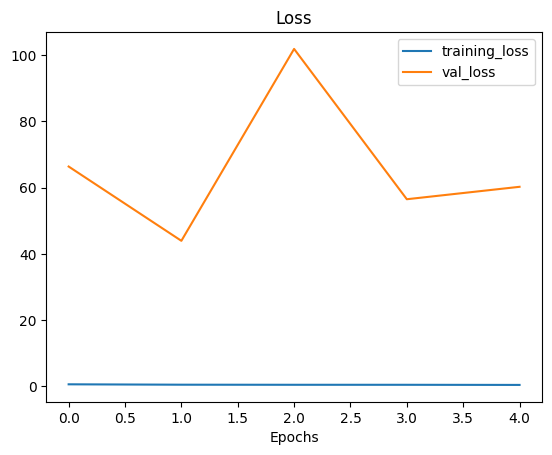

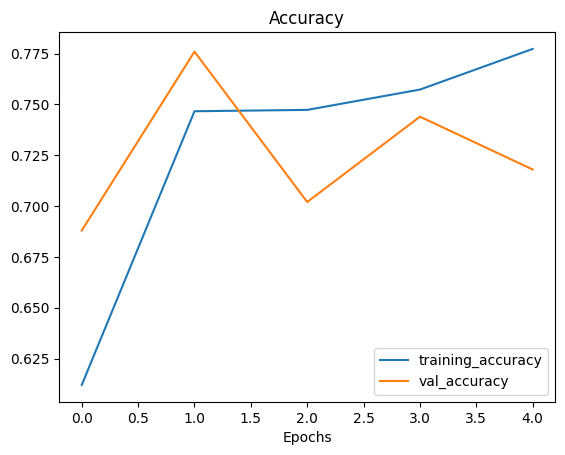

In [37]:
plot_loss_curves(history_10)

In [38]:
# Increase epochs from 5 to 10
model_11 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_11.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics="accuracy",
)

# Fit the model
history_11 = model_11.fit(
    train_data_augmented_shuffled,
    epochs=10,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
47/47 [==============================] - 28s 566ms/step - loss: 0.6419 - accuracy: 0.6147 - val_loss: 50.3805 - val_accuracy: 0.6680
Epoch 2/10
47/47 [==============================] - 21s 444ms/step - loss: 0.5305 - accuracy: 0.7287 - val_loss: 74.1542 - val_accuracy: 0.6040
Epoch 3/10
47/47 [==============================] - 23s 480ms/step - loss: 0.5031 - accuracy: 0.7613 - val_loss: 59.8169 - val_accuracy: 0.7020
Epoch 4/10
47/47 [==============================] - 21s 438ms/step - loss: 0.5049 - accuracy: 0.7640 - val_loss: 46.4451 - val_accuracy: 0.7800
Epoch 5/10
47/47 [==============================] - 22s 455ms/step - loss: 0.4712 - accuracy: 0.7827 - val_loss: 90.8660 - val_accuracy: 0.6480
Epoch 6/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4904 - accuracy: 0.7667 - val_loss: 55.1164 - val_accuracy: 0.7300
Epoch 7/10
47/47 [==============================] - 22s 462ms/step - loss: 0.4630 - accuracy: 0.7887 - val_loss: 55.8950 - val_accuracy:

In [39]:
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 conv2d_19 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, None, None, 10)    0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 conv2d_21 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                

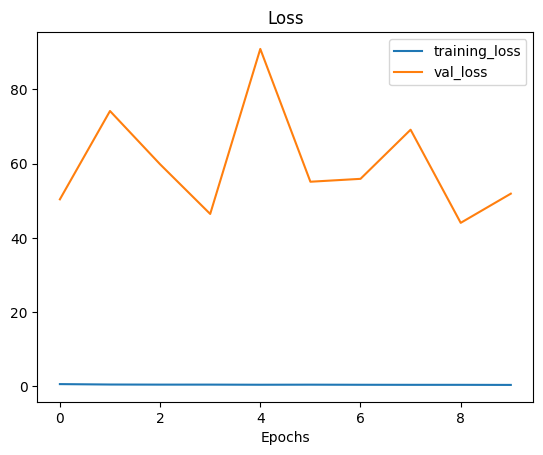

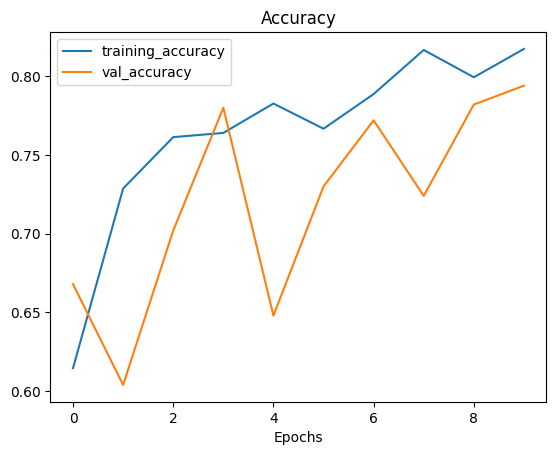

In [40]:
plot_loss_curves(history_11)

In [ ]:
# Increase epochs from 5 to 10
model_12 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_12.compile(
    optimizer=Adam(),
    loss="binary_crossentropy",
    metrics="accuracy",
)

# Fit the model
history_12 = model_11.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 21s 446ms/step - loss: 0.3480 - accuracy: 0.8533 - val_loss: 28.7719 - val_accuracy: 0.8920
Epoch 2/5
47/47 [==============================] - 22s 454ms/step - loss: 0.3228 - accuracy: 0.8613 - val_loss: 32.0135 - val_accuracy: 0.8900
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.3325 - accuracy: 0.8607 - val_loss: 142.2767 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.3148 - accuracy: 0.8693 - val_loss: 103.2661 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.3237 - accuracy: 0.8593 - val_loss: 73.2347 - val_accuracy: 0.7940


In [ ]:
# 1 line:
"""Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.4133 - accuracy: 0.8220/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
47/47 [==============================] - 25s 533ms/step - loss: 0.4133 - accuracy: 0.8220 - val_loss: 44.1678 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.3991 - accuracy: 0.8313 - val_loss: 28.2399 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 21s 443ms/step - loss: 0.3862 - accuracy: 0.8487 - val_loss: 74.9249 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 22s 466ms/step - loss: 0.4179 - accuracy: 0.8233 - val_loss: 32.0057 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.3765 - accuracy: 0.8380 - val_loss: 43.4505 - val_accuracy: 0.8080"""

# 2 lines:
"""Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8593/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
47/47 [==============================] - 22s 452ms/step - loss: 0.3506 - accuracy: 0.8593 - val_loss: 79.9232 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.3670 - accuracy: 0.8387 - val_loss: 53.1748 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 21s 441ms/step - loss: 0.3580 - accuracy: 0.8447 - val_loss: 55.9094 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 21s 453ms/step - loss: 0.3745 - accuracy: 0.8353 - val_loss: 44.0833 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 22s 459ms/step - loss: 0.3556 - accuracy: 0.8520 - val_loss: 81.0905 - val_accuracy: 0.7580
"""

# 3 lines:
"""Epoch 1/5
47/47 [==============================] - 21s 444ms/step - loss: 0.3421 - accuracy: 0.8473 - val_loss: 62.2725 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.3652 - accuracy: 0.8387 - val_loss: 47.8574 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.3508 - accuracy: 0.8600 - val_loss: 73.9920 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 21s 438ms/step - loss: 0.3542 - accuracy: 0.8507 - val_loss: 62.7844 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 23s 482ms/step - loss: 0.3415 - accuracy: 0.8547 - val_loss: 100.4432 - val_accuracy: 0.7500
""""

